In [ ]:
# This Heart Attack data Logistic Regression model is based on the 'heart.csv' file (heart attack dataset from Kaggle)
# More info on this dataset: 
  
    
# Age : Age of the patient
# Sex : Sex of the patient
# cp : Chest Pain type
#            Value 0: typical angina
#            Value 1: atypical angina
#            Value 2: non-anginal pain
#            Value 3: asymptomatic


# trtbps : resting blood pressure (in mm Hg)
# chol: cholesterol in mg/dl fetched via BMI sensor
# fbs: (fasting blood sugar > 120 mg/dl)
#            1 = true
#            0 = false
            
    
# rest_ecg: resting electrocardiographic results
#            Value 0: normal
#            Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#            Value 2: showing probable or definite left ventricular hypertrophy by Estes
            

# thalach: maximum heart rate achieved
# exang: exercise induced angina
#            1 = yes
#            0 = no
            
            
# old peak: ST depression induced by exercise relative to rest
# slp: the slope of the peak exercise ST segment
#            0 = unsloping
#            1 = flat
#            2 = downsloping
        
           
# caa: number of major vessels (0-3)
# thall : thalassemia
#            0 = null
#            1 = fixed defect
#            2 = normal
#            3 = reversable defect
            
            
# output: diagnosis of heart disease (angiographic disease status)
#            0: < 50% diameter narrowing. less chance of heart disease
#            1: > 50% diameter narrowing. more chance of heart disease

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import shap
import xgboost
from termcolor import colored as cl #text customization

In [2]:
# Phase 1: import data

data = pd.read_csv('heart.csv')
print(data.head())

print('\n', data.describe())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000  

In [3]:
# Phase 2: Splitting dataset into X and y based on row and column using iloc[]
#          and reshaping X-variable before training and testing 

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print('\nChecking X-variable before scaling\n', X)
print('\nChecking values in y\n', y)


# data partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print('\nChecking X-variable values after scaling\n', X_train)



# Checking training and testing samples for train_test_split
print('\nChecking data partitioning\nX_train samples: {}\n\nX_test samples: {}\n\ny_train samples: {}\n\ny_test samples: {}'.format(X_train, X_test, y_train, y_test))


Checking X-variable before scaling
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thal

In [4]:
# Phase 3: Creating the model
# Understanding LR parameters:
#               solver = a string ('liblinear' by deafult) that decides what solver to use for fitting the model
#               multi-class = a string ('ovr' by default) decides the approach to use for handling multiple classes\
#                             'ovr' says to make the binary fit for each class
#                              'multinomial' says to apply the multinomial loss fit
#               C = a positive floating-point number (1.0 by default) that defines the relative strength of regularization
#               random_state = an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo number

model = LogisticRegression(solver='liblinear', C=0.5, multi_class='ovr', random_state=0)
model.fit(X_train, y_train)

print('\nChecking LR output string\n', cl(model, attrs = ['bold']))
print('\nChecking LR coefficients: \n', model.coef_)
print('\nChecking LR intercept: \n', model.intercept_)


Checking LR output string
 LogisticRegression(C=0.5, multi_class='ovr', random_state=0, solver='liblinear')

Checking LR coefficients: 
 [[-4.55118365e-02 -7.10529980e-01  8.47203745e-01 -4.78566647e-01
  -2.29197623e-01 -6.78570178e-04  1.86813165e-01  6.77556904e-01
  -4.92139834e-01 -3.82959521e-01  8.00958423e-02 -4.71220027e-01
  -3.78816464e-01]]

Checking LR intercept: 
 [0.3701171]


In [5]:
# Phase 4:Evaluating the model: returns the matrix of probabilities 

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[44, 17],
       [ 7, 54]], dtype=int64)

In [6]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('\nTrain score is: \n', train_score)
print('\nTest score is: \n', test_score)


Train score is: 
 0.8342541436464088

Test score is: 
 0.8032786885245902


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79        61
           1       0.76      0.89      0.82        61

    accuracy                           0.80       122
   macro avg       0.81      0.80      0.80       122
weighted avg       0.81      0.80      0.80       122




Checking feature names in columns from X-variable: 
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

Array of SHAP values with added feature_names: 



"age" data and values 
.values =
array([-1.47777778e-01, -1.16666667e-02,  9.58333333e-02, -5.23888889e-01,
       -5.00277778e-01,  0.00000000e+00, -5.55555556e-04,  4.37222222e-01,
       -1.11111111e-03, -5.72222222e-02, -2.77777778e-04,  9.72222222e-03,
       -1.00000000e-02])

.base_values =
0.71

.data =
array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])


"sex" data and values 
.values =
array([-1.47777778e-01, -1.16666667e-02,  9.58333333e-02, -5.23888889e-01,
       -5.00277778e-01,  0.00000000e+00, -5.55555556e-04,  4.37222222e-01,
       -1.11111111e-03, -5.72222222e-02, -2.77777778e-04,  9.72222222e-03,
       -1.00000000e-02])

.base_values =
0.71

.data =
array([ 63. ,   1. ,   3. , 145. , 233. ,   1. , 

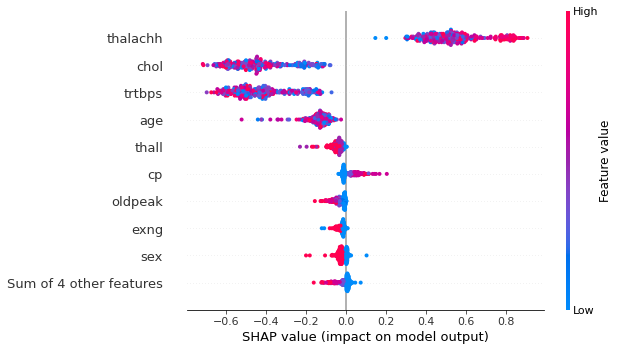

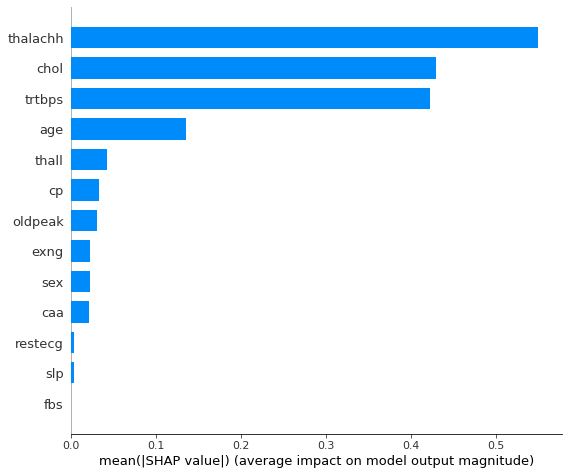

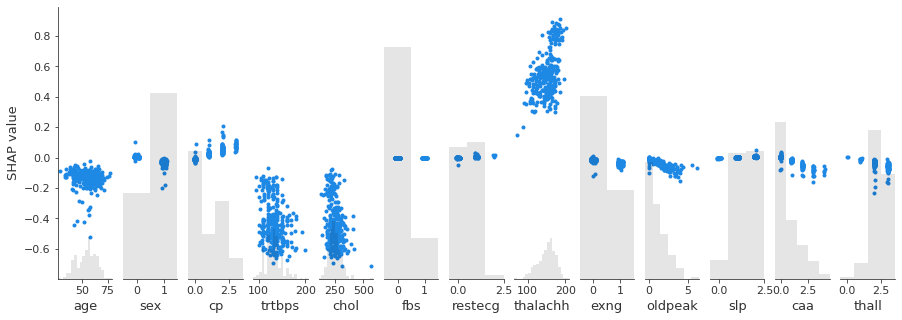

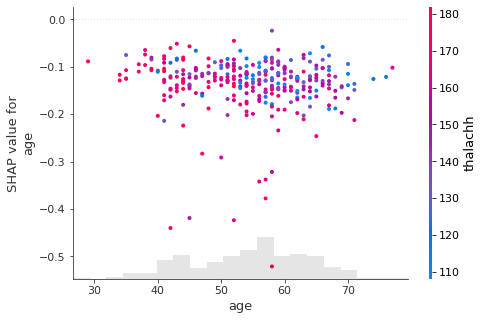

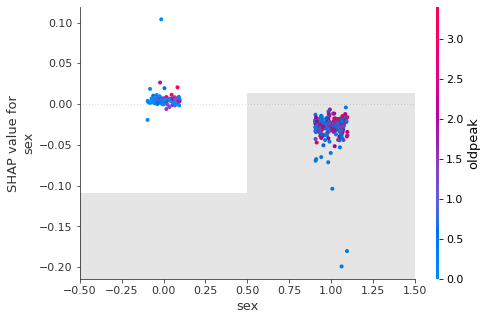

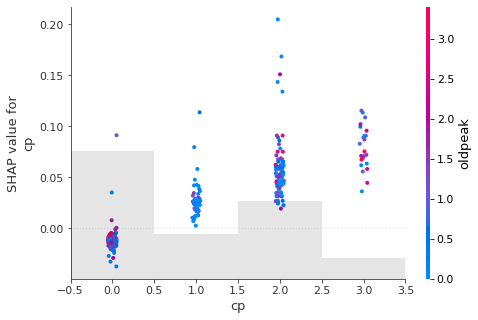

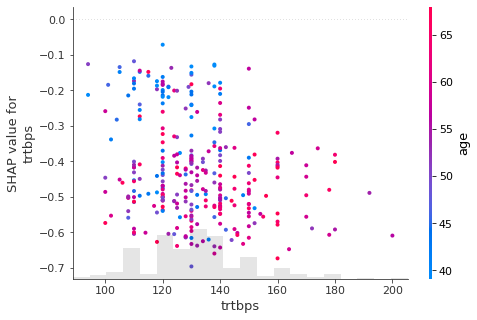

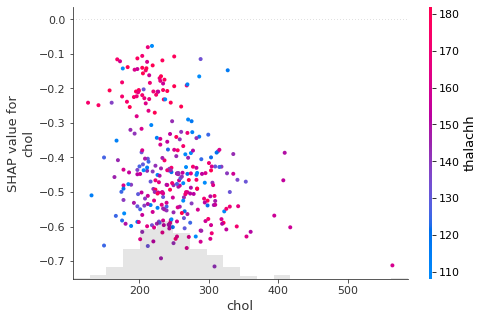

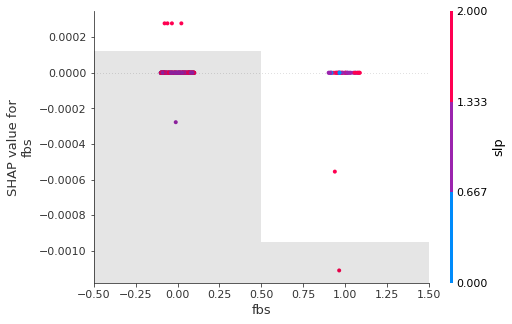

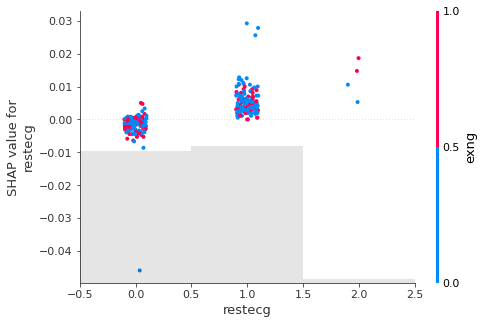

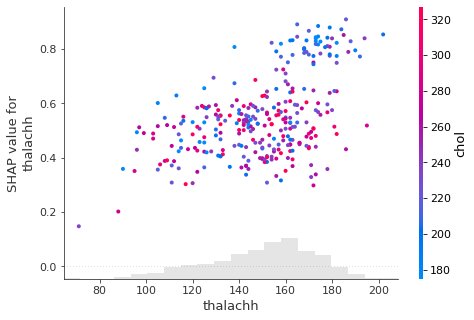

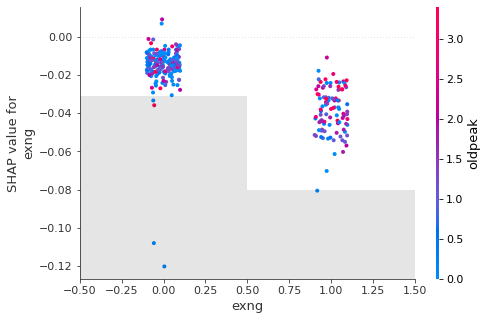

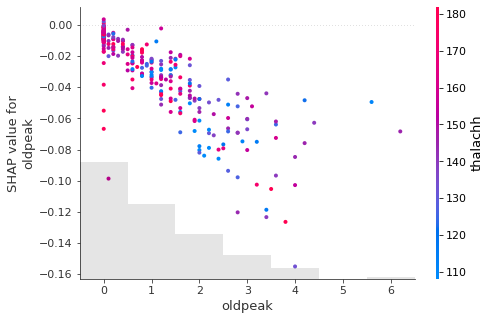

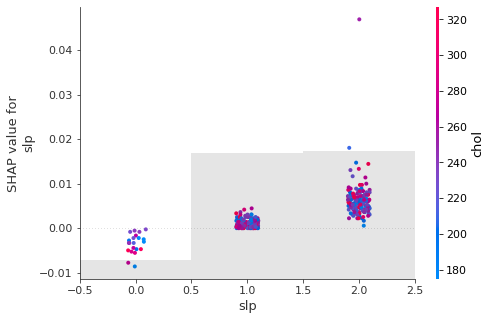

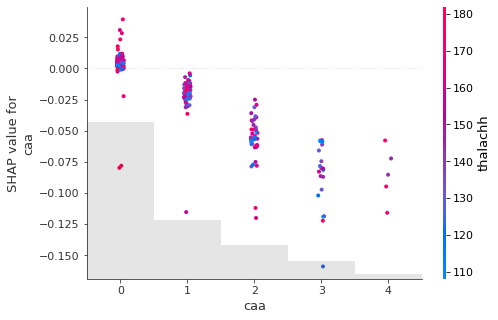

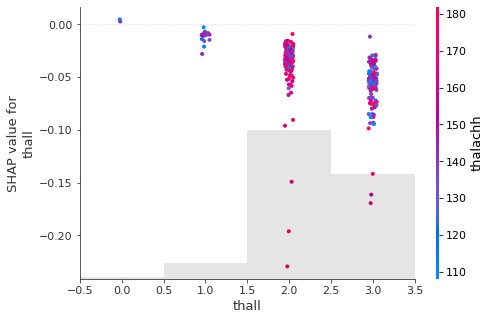

In [8]:
# Phase 5: Creating SHAP explainer object
#          Creating feature_names array to store features to be able to use in shap plots/graphs
#          Finding 'best' way to represent dataset using SHAP visualization


feature_names = []
for feature in X.columns.tolist():
    feature_names.append(feature)
print('\nChecking feature names in columns from X-variable: \n', feature_names)


explainer = shap.Explainer(model.predict, X_test, feature_names=feature_names)
shap_values = explainer(X)



# for-loop goes through shap_values which stores .base_values, .values, .data while also looping
#            through feature_names to assign respective shap_value to its corresponding feature name
# Break the inner loop to execute string based on length of the feature_names array or else inner-loop
#            will repeat string format all # of times of length in feature_names
print('\nArray of SHAP values with added feature_names: \n')
for name in feature_names: 
    print('\n')
    for value in shap_values:
        print('"{}" data and values \n{}'.format(name, value))
        break
        

# By default, a SHAP beeswarm plot will take the mean absolute value of each feature
#             over all the instances (rows) of the dataset
# Each point on the chart is one SHAP value for a prediction and feature
# Red color means higher value of a feature. Blue means lower value of a feature.
# We can get the general sense of features' directionality impact based on the distribution of 
#            the red and blue dots
shap.plots.beeswarm(shap_values)


# In this chart, the x-axis stands for the SHAP value and the y-axis has all the features
shap.summary_plot(shap_values, feature_names, plot_type='bar')



# Interesting SHAP scatter plot summary of all SHAP values for each feature
shap.plots.scatter(shap_values[:,:])


# for-loop for SHAP scatter plots to show correlation between different features
for feature in feature_names:
    shap.plots.scatter(shap_values[:, feature], color=shap_values)

In [9]:
# References to put code together, compile, and test run of a Logistic Regression model using SHAP
#           Splitting CSV Into Trainand Test Data by Nishank Sharma: https://medium.com/themlblog/splitting-csv-into-train-and-test-data-1407a063dd74
#           Logistic Regression in Python by Mirko Stojiljkovic: https://realpython.com/logistic-regression-python/
#           How to interpret machine learning (ML) models with SHAP values by Xiaoyou Wang: https://www.mage.ai/blog/how-to-interpret-explain-machine-learning-models-using-shap-values
#           SHAP explainer and models: https://www.mage.ai/blog/how-to-interpret-explain-machine-learning-models-using-shap-values
#           Dataset taken from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download
#           scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#           SHAP Force Plots for Classification by Max Steele: https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195
#           Machine Learning - Logistic Regression with Python by Nikhil Adithyan: https://medium.com/codex/machine-learning-logistic-regression-with-python-5ed4ded9d146